<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Prediction-+-confidence-and-Bayesian-confidence-interval" data-toc-modified-id="Prediction-+-confidence-and-Bayesian-confidence-interval-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prediction + confidence and Bayesian confidence interval</a></span></li><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#Import-dataset" data-toc-modified-id="Import-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Import dataset</a></span></li><li><span><a href="#Fit-an-ARIMA-model" data-toc-modified-id="Fit-an-ARIMA-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fit an ARIMA model</a></span></li><li><span><a href="#Forecast-+-uncertainty" data-toc-modified-id="Forecast-+-uncertainty-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Forecast + uncertainty</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Uncertainity for ARIMA model

<br></font>
</div>

# Prediction + confidence and Bayesian confidence interval

<div class="alert alert-block alert-info">
<font color=black><br>

- A **prediction interval** is an interval associated with a random variable yet to be observed, with a specified probability of the random variable lying within the interval. For example, I might give an 80% interval for the forecast of GDP in 2014. The actual GDP in 2014 should lie within the interval with probability 0.8. Prediction intervals can arise in Bayesian or frequentist statistics.

- A **confidence interval** is an interval associated with a parameter and is a frequentist concept. The parameter is assumed to be non-random but unknown, and the confidence interval is computed from data. Because the data are random, the interval is random. A 95% confidence interval will contain the true parameter with probability 0.95. That is, with a large number of repeated samples, 95% of the intervals would contain the true parameter.

- A **Bayesian confidence interval**, also known as a “credible interval”, is an interval associated with the posterior distribution of the parameter. In the Bayesian perspective, parameters are treated as random variables, and so have probability distributions. Thus a Bayesian confidence interval is like a prediction interval, but associated with a parameter rather than an observation.

<br></font>
</div>

# Import modules

In [18]:
from pandas import read_csv
from matplotlib import pyplot
# Make sure statsmodels is up to date: pip install statsmodels --upgrade
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = 17, 8
rcParams['font.size'] = 20

In [3]:
import statsmodels
statsmodels.__version__

'0.12.2'

# Import dataset

In [19]:
# load data
series = read_csv('../DATASETS/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]


In [34]:
series

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, Length: 365, dtype: int64

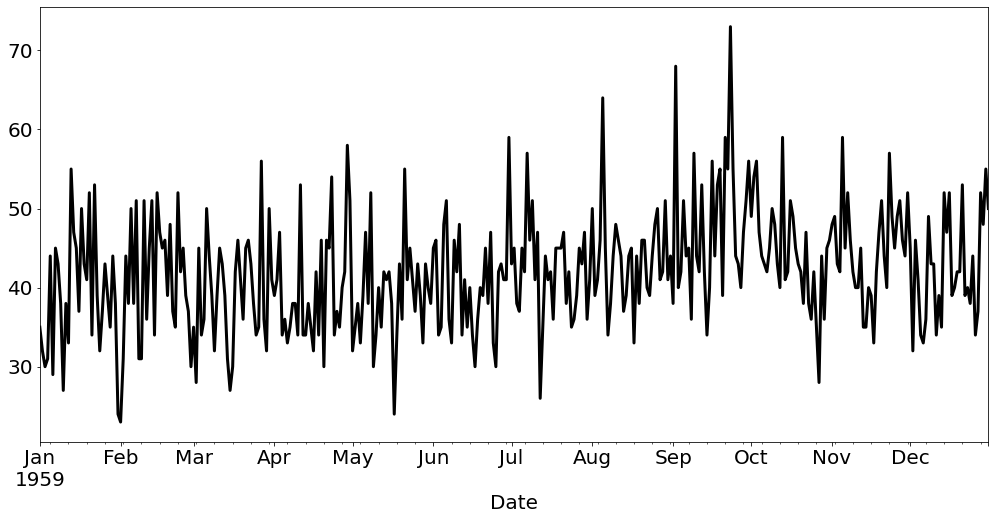

In [24]:
series.plot(c = "k", lw = 3)
pyplot.show()

# Fit an ARIMA model

In [28]:
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit()

# Forecast + uncertainty

<div class="alert alert-block alert-info">
<font color=black><br>

- Although the function is called **conf_int** as in confidence_interval what is really doing is to compute the prediction interval.
- The only reason I can think of about this confusing usage of nomenclature is that the developer, maybe were not aware of the difference.
- **alpha** is the complement to 1. So if you provide 5% is computes the prediction interval valus for a where there is a 95% probablity the forecast fall within these two upper and lower intervals.

<br></font>
</div>

In [36]:
result = model_fit.get_forecast()
# summarize forecast and confidence intervals
print('Expected: %.3f' % result.predicted_mean)
print('Forecast: %.3f' % test[0])
print('Standard Error: %.3f' % result.se_mean)
ci = result.conf_int(0.05)
print('95%% Interval: %.3f to %.3f' % (ci[0,0], ci[0,1]))

Expected: 45.149
Forecast: 50.000
Standard Error: 7.009
95% Interval: 31.413 to 58.886


In [39]:
# Let see what the results look like for different values
forecast = result.predicted_mean
print(forecast)
# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]
for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

[45.14927516]
80.0% Confidence Interval: 45.149 between 36.167 and 54.131
90.0% Confidence Interval: 45.149 between 33.621 and 56.677
95.0% Confidence Interval: 45.149 between 31.413 and 58.886
99.0% Confidence Interval: 45.149 between 27.096 and 63.202


# Conclusions

<div class="alert alert-block alert-danger">
<font color=black><br>

- Prediction and confidence interval are not the same.

<br></font>
</div>

# References

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/time-series-forecast-uncertainty-using-confidence-intervals-python/
- [On the difference between confidence and prediction intervals](https://robjhyndman.com/hyndsight/intervals/)

</font>
</div>